In [1]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
# Load Data
df = pd.read_csv('salaries.csv')
print("Data preview:\n", df.head())

Data preview:
   company                  job     degree  salary_more_then_100k
0  google      sales executive  bachelors                      0
1  google      sales executive    masters                      0
2  google     business manager  bachelors                      1
3  google     business manager    masters                      1
4  google  computer programmer  bachelors                      0


In [3]:
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'O':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [4]:
print("Data preview:\n", df.head())

Data preview:
    company  job  degree  salary_more_then_100k
0        2    2       0                      0
1        2    2       1                      0
2        2    0       0                      1
3        2    0       1                      1
4        2    1       0                      0


In [5]:
X = df.drop('salary_more_then_100k', axis=1)
y = df['salary_more_then_100k']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [7]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

Confusion Matrix:
 [[2 0]
 [1 1]]


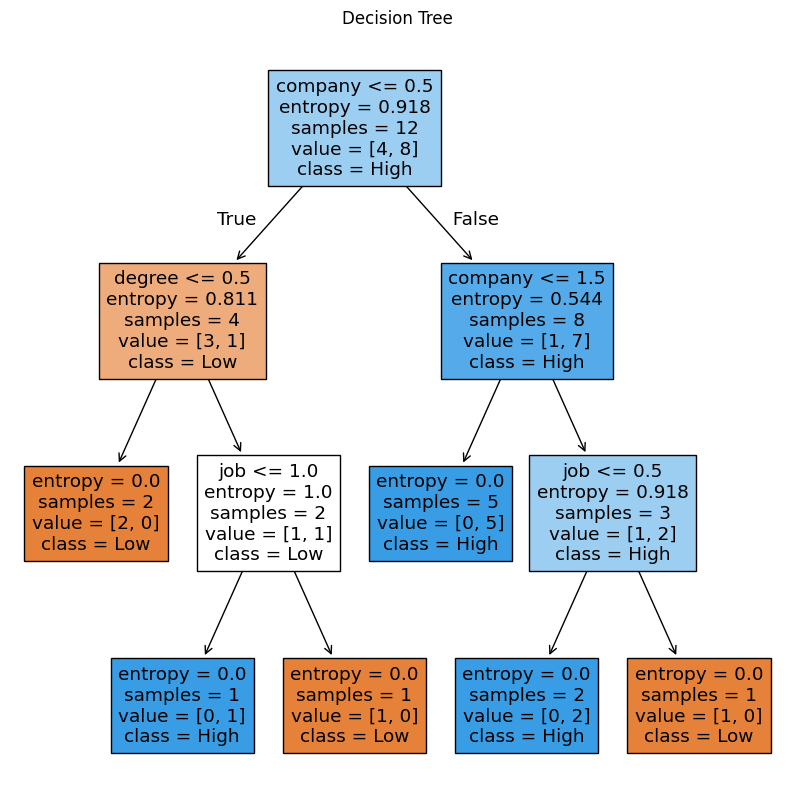

In [8]:
# Visualize Tree
plt.figure(figsize=(10, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Low', 'High'], filled=True)
plt.title("Decision Tree")
plt.show()